# Testing US Economic Data Functions

This notebook tests the functions from `us_economic_data.py` for downloading and processing US economic data from FRED.

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fredapi import Fred
import psycopg2
from datetime import datetime, timedelta

### Import Functions from us_economic_data.py

In [2]:
import sys
sys.path.append('..')
from dags.us_economic_data import download_fred_data, validate_data, insert_fred_data_manual

### Download and Test FRED Data

In [3]:
# Download data for the last 5 years (default)
df = download_fred_data()
print("Data shape:", df.shape)
print("\nSample of downloaded data:")
display(df.head(10))

Fetching data from 2020-04-03 to 2025-04-03
(Using 2019-04-03 as query start to ensure data availability)
Retrieved 23 observations for GDP
GDP: 1305/1305 data points available (100.0%)


/Users/hohin/Desktop/INFORMATION SYSTEMS/Y2S2/IS3107/stock-prediction/notebooks/../dags/us_economic_data.py:70: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample('Q').last()


Retrieved 23 observations for Real_GDP
Real_GDP: 1305/1305 data points available (100.0%)


/Users/hohin/Desktop/INFORMATION SYSTEMS/Y2S2/IS3107/stock-prediction/notebooks/../dags/us_economic_data.py:70: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample('Q').last()


Retrieved 71 observations for Unemployment_Rate
Unemployment_Rate: 1305/1305 data points available (100.0%)


/Users/hohin/Desktop/INFORMATION SYSTEMS/Y2S2/IS3107/stock-prediction/notebooks/../dags/us_economic_data.py:75: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').last()


Retrieved 71 observations for CPI
CPI: 1305/1305 data points available (100.0%)


/Users/hohin/Desktop/INFORMATION SYSTEMS/Y2S2/IS3107/stock-prediction/notebooks/../dags/us_economic_data.py:75: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').last()


Retrieved 1566 observations for Fed_Funds_Rate
Fed_Funds_Rate: 1305/1305 data points available (100.0%)
Retrieved 1566 observations for SP500
SP500: 1305/1305 data points available (100.0%)

Final data summary:
Date range: 2020-04-03 00:00:00 to 2025-04-03 00:00:00
GDP: 100.0% available data
Real_GDP: 100.0% available data
Unemployment_Rate: 100.0% available data
CPI: 100.0% available data
Fed_Funds_Rate: 100.0% available data
SP500: 100.0% available data
Data shape: (1305, 7)

Sample of downloaded data:


,date,GDP,Real_GDP,Unemployment_Rate,CPI,Fed_Funds_Rate,SP500
0,2020-04-03,21727.657,20693.238,4.4,258.076,0.05,2488.65
1,2020-04-06,21727.657,20693.238,4.4,258.076,0.05,2663.68
2,2020-04-07,21727.657,20693.238,4.4,258.076,0.05,2659.41
3,2020-04-08,21727.657,20693.238,4.4,258.076,0.05,2749.98
4,2020-04-09,21727.657,20693.238,4.4,258.076,0.05,2789.82
5,2020-04-10,21727.657,20693.238,4.4,258.076,0.05,2789.82
6,2020-04-13,21727.657,20693.238,4.4,258.076,0.05,2761.63
7,2020-04-14,21727.657,20693.238,4.4,258.076,0.05,2846.06
8,2020-04-15,21727.657,20693.238,4.4,258.076,0.05,2783.36
9,2020-04-16,21727.657,20693.238,4.4,258.076,0.05,2799.55


In [4]:
# Download data for a specific date range
start_date = '2020-01-01'
end_date = '2024-01-01'
df_custom = download_fred_data(start_date=start_date, end_date=end_date)
print("Data shape:", df_custom.shape)
print("\nSample of downloaded data:")
display(df_custom.head(10))

Fetching data from 2020-01-01 to 2024-01-01
(Using 2019-01-01 as query start to ensure data availability)
Retrieved 21 observations for GDP
GDP: 1044/1044 data points available (100.0%)


/Users/hohin/Desktop/INFORMATION SYSTEMS/Y2S2/IS3107/stock-prediction/notebooks/../dags/us_economic_data.py:70: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample('Q').last()


Retrieved 21 observations for Real_GDP
Real_GDP: 1044/1044 data points available (100.0%)


/Users/hohin/Desktop/INFORMATION SYSTEMS/Y2S2/IS3107/stock-prediction/notebooks/../dags/us_economic_data.py:70: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample('Q').last()


Retrieved 61 observations for Unemployment_Rate
Unemployment_Rate: 1044/1044 data points available (100.0%)


/Users/hohin/Desktop/INFORMATION SYSTEMS/Y2S2/IS3107/stock-prediction/notebooks/../dags/us_economic_data.py:75: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').last()


Retrieved 61 observations for CPI
CPI: 1044/1044 data points available (100.0%)


/Users/hohin/Desktop/INFORMATION SYSTEMS/Y2S2/IS3107/stock-prediction/notebooks/../dags/us_economic_data.py:75: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').last()


Retrieved 1305 observations for Fed_Funds_Rate
Fed_Funds_Rate: 1044/1044 data points available (100.0%)
Retrieved 1305 observations for SP500
SP500: 1044/1044 data points available (100.0%)

Final data summary:
Date range: 2020-01-01 00:00:00 to 2024-01-01 00:00:00
GDP: 100.0% available data
Real_GDP: 100.0% available data
Unemployment_Rate: 100.0% available data
CPI: 100.0% available data
Fed_Funds_Rate: 100.0% available data
SP500: 100.0% available data
Data shape: (1044, 7)

Sample of downloaded data:


,date,GDP,Real_GDP,Unemployment_Rate,CPI,Fed_Funds_Rate,SP500
0,2020-01-01,21933.217,20985.448,3.6,258.63,1.55,3230.78
1,2020-01-02,21933.217,20985.448,3.6,258.63,1.55,3257.85
2,2020-01-03,21933.217,20985.448,3.6,258.63,1.55,3234.85
3,2020-01-06,21933.217,20985.448,3.6,258.63,1.55,3246.28
4,2020-01-07,21933.217,20985.448,3.6,258.63,1.55,3237.18
5,2020-01-08,21933.217,20985.448,3.6,258.63,1.55,3253.05
6,2020-01-09,21933.217,20985.448,3.6,258.63,1.55,3274.70
7,2020-01-10,21933.217,20985.448,3.6,258.63,1.54,3265.35
8,2020-01-13,21933.217,20985.448,3.6,258.63,1.54,3288.13
9,2020-01-14,21933.217,20985.448,3.6,258.63,1.54,3283.15


### Validate Data

In [5]:
# Validate the downloaded data
validate_data(df)

### Data Visualization

Fetching data from 2020-04-03 to 2025-04-03
(Using 2019-04-03 as query start to ensure data availability)
Retrieved 23 observations for GDP
GDP: 1305/1305 data points available (100.0%)


/Users/hohin/Desktop/INFORMATION SYSTEMS/Y2S2/IS3107/stock-prediction/notebooks/../dags/us_economic_data.py:70: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample('Q').last()


Retrieved 23 observations for Real_GDP
Real_GDP: 1305/1305 data points available (100.0%)


/Users/hohin/Desktop/INFORMATION SYSTEMS/Y2S2/IS3107/stock-prediction/notebooks/../dags/us_economic_data.py:70: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample('Q').last()


Retrieved 71 observations for Unemployment_Rate
Unemployment_Rate: 1305/1305 data points available (100.0%)


/Users/hohin/Desktop/INFORMATION SYSTEMS/Y2S2/IS3107/stock-prediction/notebooks/../dags/us_economic_data.py:75: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').last()


Retrieved 71 observations for CPI
CPI: 1305/1305 data points available (100.0%)


/Users/hohin/Desktop/INFORMATION SYSTEMS/Y2S2/IS3107/stock-prediction/notebooks/../dags/us_economic_data.py:75: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').last()


Retrieved 1566 observations for Fed_Funds_Rate
Fed_Funds_Rate: 1305/1305 data points available (100.0%)
Retrieved 1566 observations for SP500
SP500: 1305/1305 data points available (100.0%)

Final data summary:
Date range: 2020-04-03 00:00:00 to 2025-04-03 00:00:00
GDP: 100.0% available data
Real_GDP: 100.0% available data
Unemployment_Rate: 100.0% available data
CPI: 100.0% available data
Fed_Funds_Rate: 100.0% available data
SP500: 100.0% available data


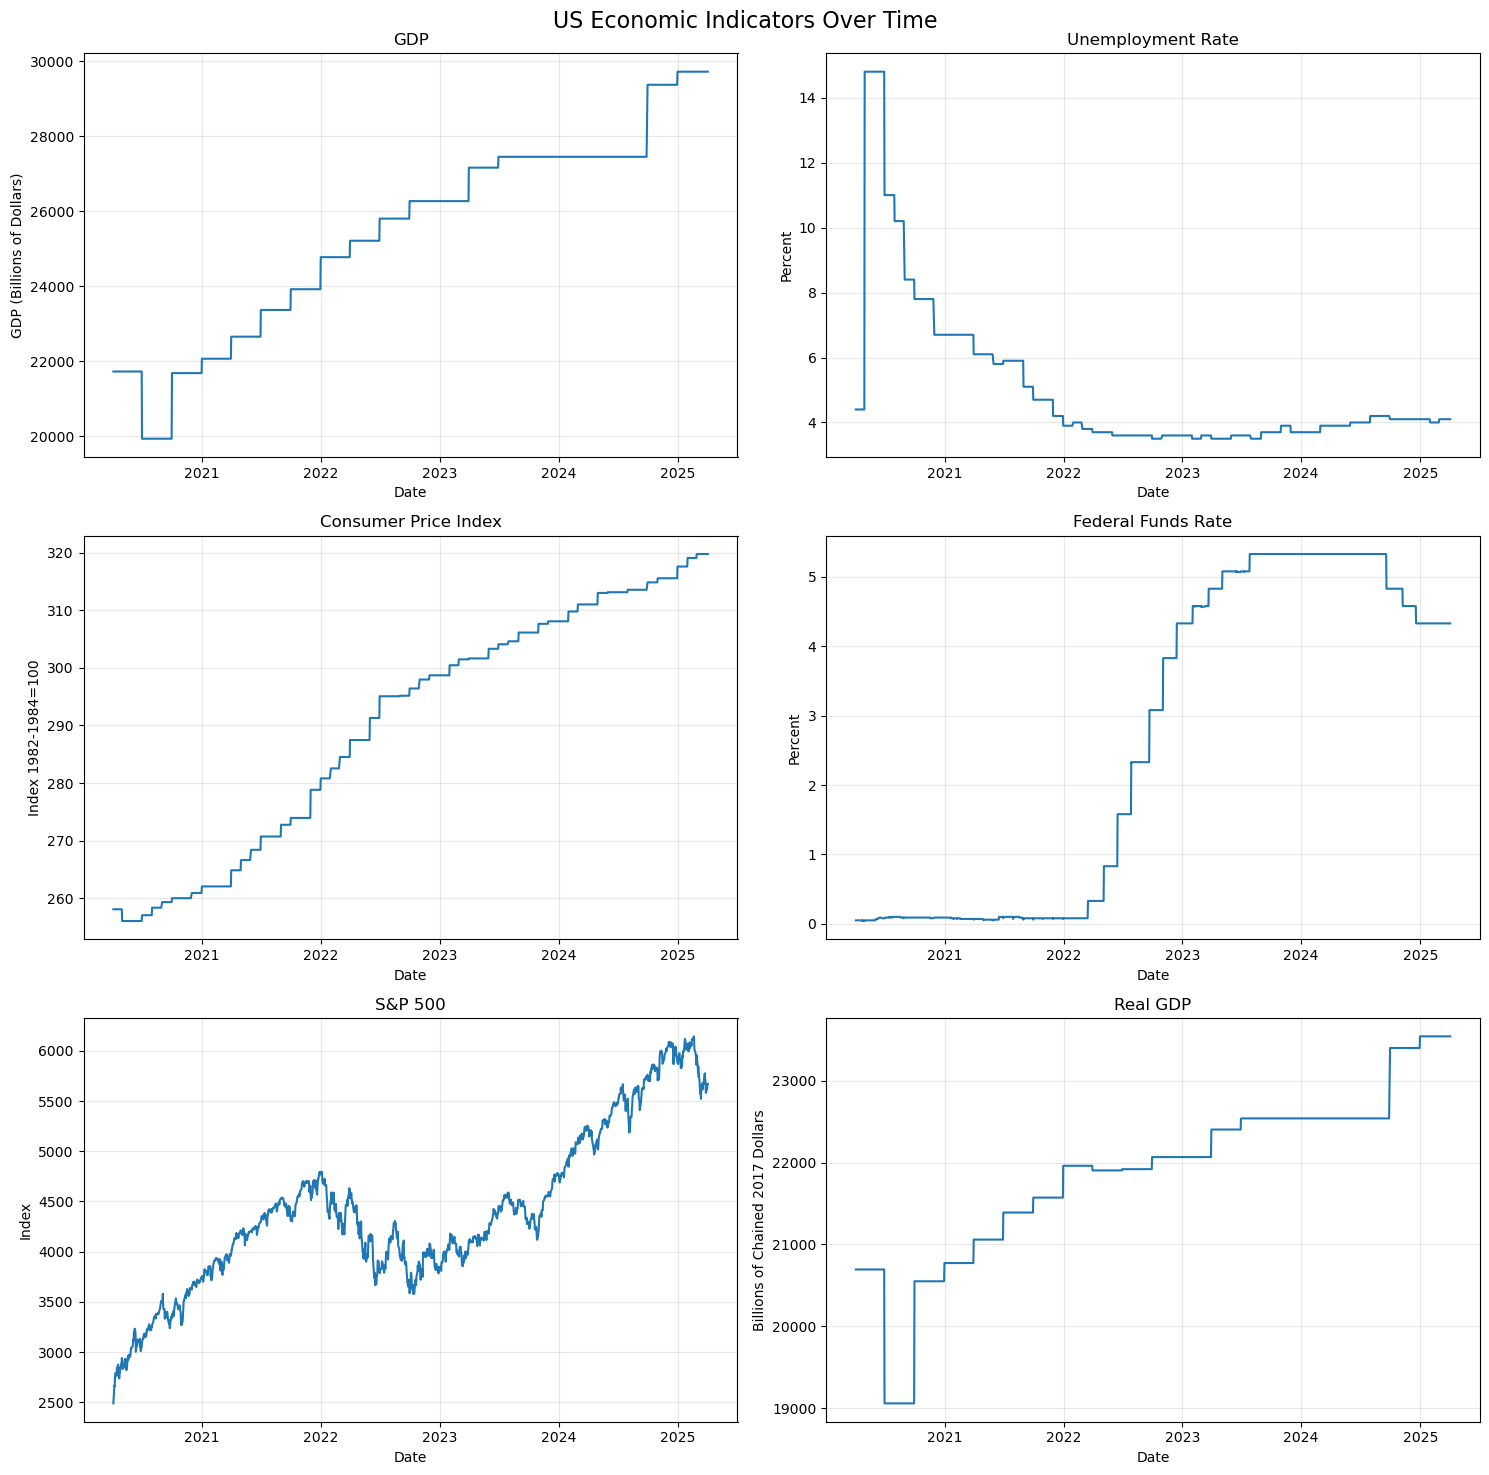

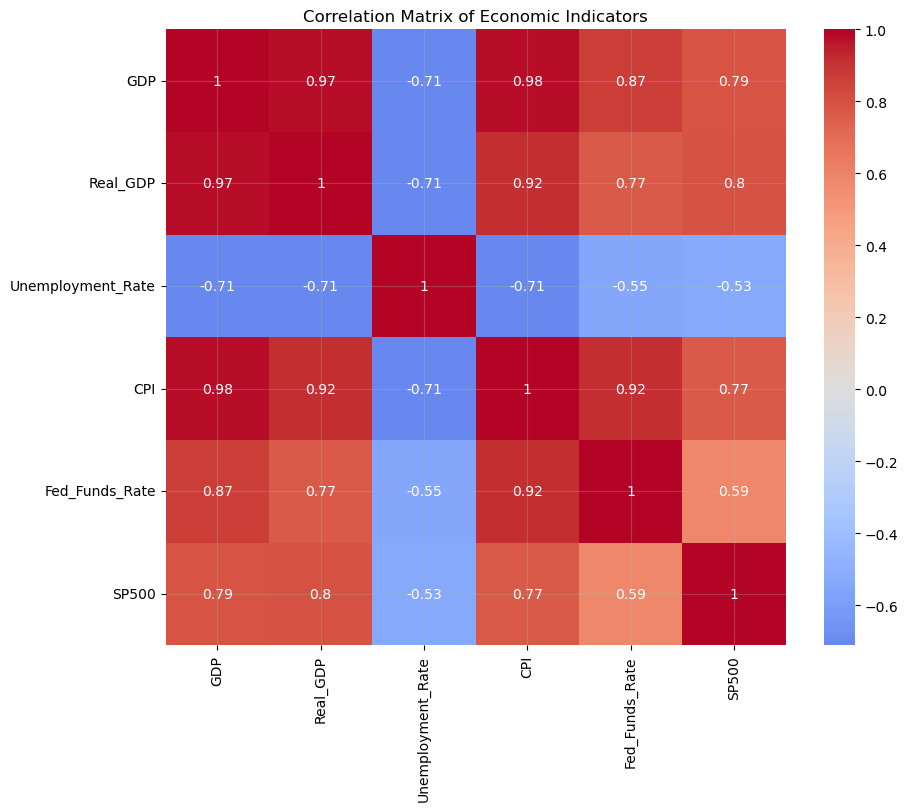

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set basic matplotlib parameters for better visualization
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Download data for the last 5 years (default)
df = download_fred_data()

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 2)
fig.suptitle('US Economic Indicators Over Time', fontsize=16)

# Plot GDP
axes[0, 0].plot(df['date'], df['GDP'])
axes[0, 0].set_title('GDP')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('GDP (Billions of Dollars)')

# Plot Unemployment Rate
axes[0, 1].plot(df['date'], df['Unemployment_Rate'])
axes[0, 1].set_title('Unemployment Rate')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Percent')

# Plot CPI
axes[1, 0].plot(df['date'], df['CPI'])
axes[1, 0].set_title('Consumer Price Index')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Index 1982-1984=100')

# Plot Fed Funds Rate
axes[1, 1].plot(df['date'], df['Fed_Funds_Rate'])
axes[1, 1].set_title('Federal Funds Rate')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Percent')

# Plot S&P 500
axes[2, 0].plot(df['date'], df['SP500'])
axes[2, 0].set_title('S&P 500')
axes[2, 0].set_xlabel('Date')
axes[2, 0].set_ylabel('Index')

# Plot Real GDP
axes[2, 1].plot(df['date'], df['Real_GDP'])
axes[2, 1].set_title('Real GDP')
axes[2, 1].set_xlabel('Date')
axes[2, 1].set_ylabel('Billions of Chained 2017 Dollars')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Create a new figure for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('date', axis=1).corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Economic Indicators')
plt.show()

### Basic Data Analysis

Basic Statistics:


,date,GDP,Real_GDP,Unemployment_Rate,CPI,Fed_Funds_Rate,SP500
count,1305,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000
mean,2022-10-03 14:24:00.000000256,25378.696056,21857.813888,5.033257,290.107005,2.621441,4406.089632
min,2020-04-03 00:00:00,19935.444000,19056.617000,3.500000,256.032000,0.040000,2488.650000
25%,2021-07-05 00:00:00,23368.861000,21389.005000,3.600000,270.710000,0.090000,3909.520000
50%,2022-10-04 00:00:00,26272.011000,22066.784000,4.000000,296.421000,3.080000,4308.500000
75%,2024-01-03 00:00:00,27453.815000,22539.418000,5.800000,308.087000,5.080000,4780.240000
max,2025-04-03 00:00:00,29723.864000,23542.349000,14.800000,319.775000,5.330000,6144.150000
std,NaN,2679.399768,1028.562238,2.444067,20.895132,2.334888,789.561467


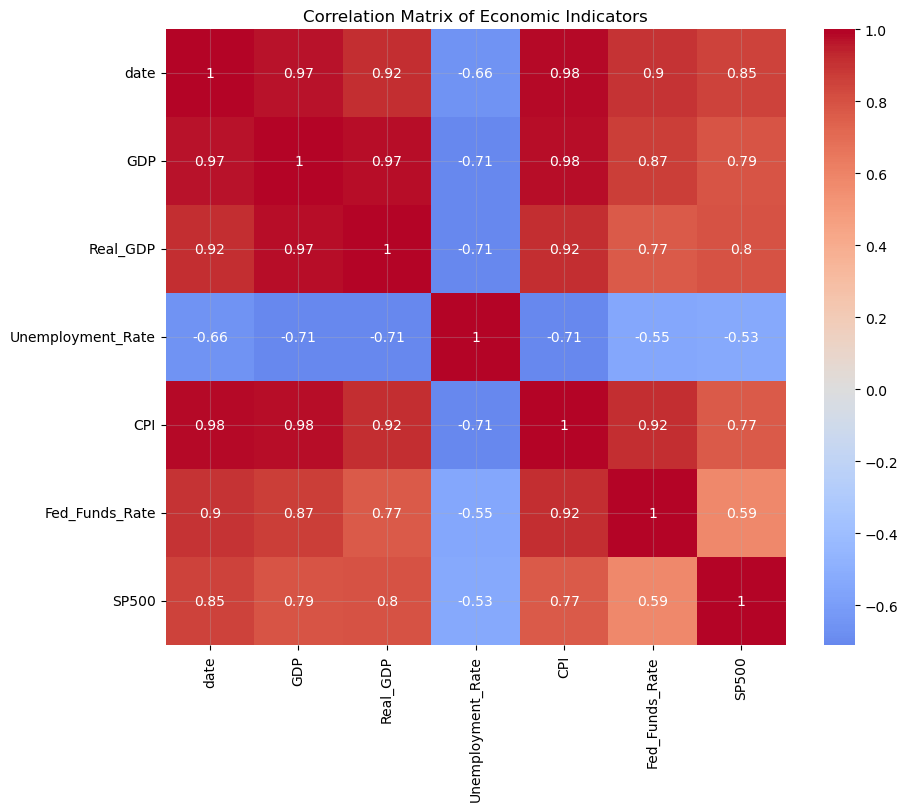

In [7]:
# Basic statistics
print("Basic Statistics:")
display(df.describe())

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Economic Indicators')
plt.show()